In [30]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
print(individual_household_electric_power_consumption)

{'data': {'ids': None, 'features':                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2 

In [4]:
import pandas as pd
import numpy as np


df = individual_household_electric_power_consumption.data.features.copy()  # full DataFrame


In [5]:
# Create a new column called 'Datetime' by combining Date and Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
df.drop(columns=['Date', 'Time'], inplace=True)  # Keep Datetime if you still need it

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
# List of numeric columns to convert
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert to float
df[numeric_cols] = df[numeric_cols].astype(float)

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.drop(columns=['Datetime'])

In [11]:
# Set features (all columns except the target)
X = df.drop(columns=['Global_active_power'])

# Set target (what we want to predict)
y = df['Global_active_power']

In [12]:
print(X.head())   # first 5 rows of features

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  
0             1.0            17.0  
1             1.0            16.0  
2             2.0            17.0  
3             1.0            17.0  
4             1.0            17.0  


In [13]:
print(y.head())   # first 5 rows of target

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [14]:
print(X.shape)    # (rows, columns)
print(y.shape)

(2049280, 6)
(2049280,)


In [15]:
print(df.shape)  # Number of rows and columns

(2049280, 7)


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None


In [17]:
print(df.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [18]:
print(df.isnull().sum())  # Check for missing values in each column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [19]:
print(df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

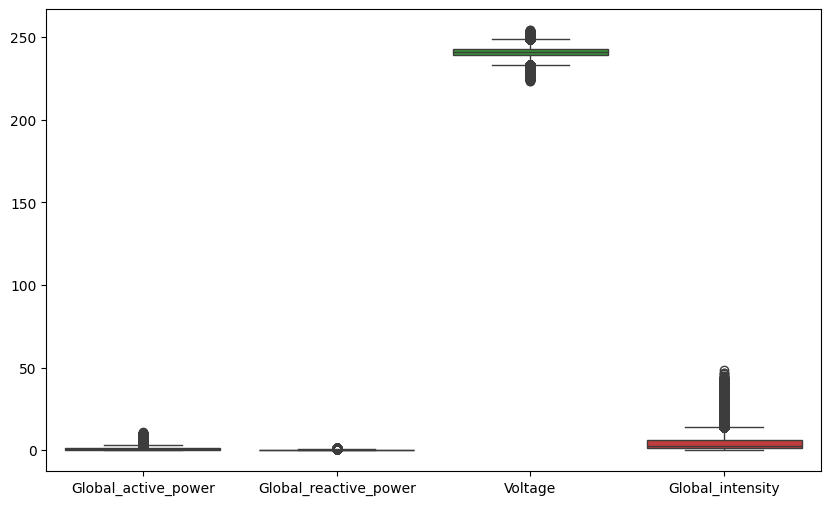

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.show()

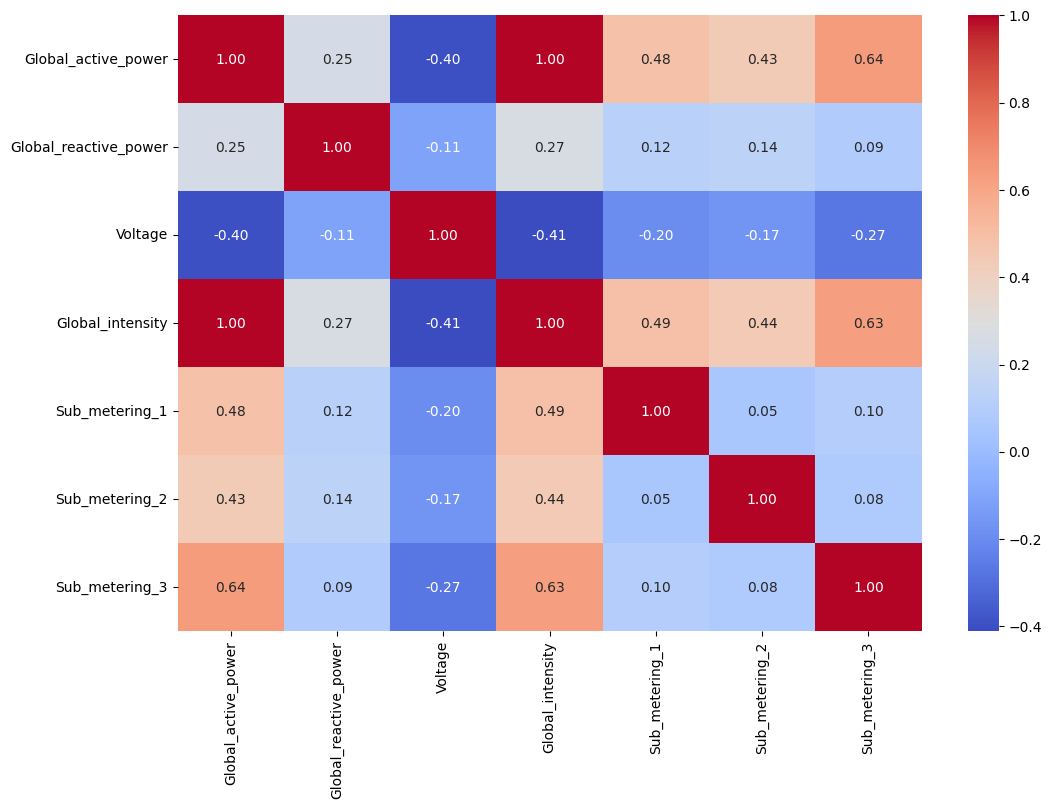

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
print(lr_model.coef_) #m value
print(lr_model.intercept_) #c value

[-0.17578678  0.0044532   0.23803781 -0.00032879 -0.00044213  0.00217587]
-1.0738468853039795


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Linear Regression Model Evaluation:")
y_pred_lr = lr_model.predict(X_test)
print('r2_score is: ', r2_score(y_test, y_pred_lr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Model Evaluation:
r2_score is:  0.9985500910441268
Mean Absolute Error: 0.025838930356817672
Mean Squared Error: 0.0016296157203171905
Root Mean Squared Error: 0.040368499109047766


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=50)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Model Evaluation:
R²: 0.9990465236091769
Mean Absolute Error (MAE): 0.01863263384177286
Mean Squared Error (MSE): 0.001071653574621119
Root Mean Squared Error (RMSE): 0.03273612033551195


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf_model = grid_rf.best_estimator_

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=50)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting Model Evaluation:
R²: 0.9984765944242934
Mean Absolute Error (MAE): 0.026545717318895178
Mean Squared Error (MSE): 0.0017122217671214919
Root Mean Squared Error (RMSE): 0.04137900152397943


In [54]:
from sklearn.neural_network import MLPRegressor

# Initialize model
nn_model = MLPRegressor(hidden_layer_sizes=(50), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("\nNeural Network Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_nn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_nn))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_nn))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_nn)))


Neural Network Model Evaluation:
R²: 0.9982977233505629
Mean Absolute Error (MAE): 0.0326354988511094
Mean Squared Error (MSE): 0.0019132627445431504
Root Mean Squared Error (RMSE): 0.04374085898268518
